[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)

In [90]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

## O problema

Temos um problema de dinâmica de corpo rigido com uma massa $m$ que é ligada a uma mola de constante $k$ que tem um amortecimento $c$. 
A equação é então regida por

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Neste caso teremos uma força harmônica dada por

$$
f \equiv f(t) = f_0 \cdot \cos \left(\omega t - \varphi\right)
$$

In [91]:
import numpy as np
from matplotlib import pyplot as plt

# The system
k = 1
c = 0.5
m = 1
wn = np.sqrt(k/m)
xi = c/(2*np.sqrt(k*m))
mu = np.sqrt(1-xi**2)
print("Mass-spring-damper parameters")
print("     m = %.3f" % m)
print("     c = %.3f" % c)
print("     k = %.3f" % k)
print("    wn = %.3f" % wn)
print("    xi = %.3f" % xi)
print("    mu = %.3f" % mu)

Mass-spring-damper parameters
     m = 1.000
     c = 0.500
     k = 1.000
    wn = 1.000
    xi = 0.250
    mu = 0.968


In [92]:
# The initial conditions
x0 = 1
v0 = 1
A = x0
B = (xi/mu)*x0 + v0/(mu*wn)
C = np.sqrt(A**2+B**2)
the = np.arctan2(A, B)
print("Initial conditions")
print("    x0 = %.3f" % x0)
print("    v0 = %.3f" % v0)
print("     A = %.3f" % A)
print("     B = %.3f" % B)
print("     C = %.3f" % C)
print("   the = %.3f" % the)

Initial conditions
    x0 = 1.000
    v0 = 1.000
     A = 1.000
     B = 1.291
     C = 1.633
   the = 0.659


In [93]:
# The force
f0 = 1
w = 2.4
phi = 0
print("Force ")
print("    f0 = %.3f" % f0)
print("     w = %.3f" % w)
print("   phi = %.3f" % phi)

Force 
    f0 = 1.000
     w = 2.400
   phi = 0.000


A solução desse problema envolve duas partes

$$
x(t) = C \cdot \exp\left(-\xi \omega_{n} t\right) \cdot \cos \left(\mu \omega_{n} t + \phi\right)  + U(\omega) \cdot \cos \left(\omega t + \varphi\right)
$$

Em que

$$
U(\omega) = \dfrac{f_0}{\sqrt{(1-r^2)^2 + (2\xi r)^2}}
$$

$$
r = \dfrac{\omega}{\omega_n} \Rightarrow \omega = r \omega_{n}
$$

In [94]:
T = 100
r = w/wn

def computeH(xi, r):
    H = (1-r**2) + 1j * (2*xi*r)
    return H

npts = 1025
H = computeH(xi, r)
U = f0/np.abs(H)
t = np.linspace(0, T, npts)
x_transi = np.exp(-xi*wn*t) * (A*np.cos(mu*wn*t) + B*np.sin(mu*wn*t))
x_forced = U * np.cos(w*t - phi)
x_total = x_transi + x_forced

Text(0, 0.5, 'Deslocamento $x$ (m)')

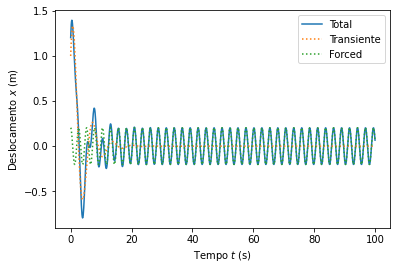

In [95]:
plt.figure()
plt.plot(t, x_total, label="Total")
plt.plot(t, x_transi, ls="dotted", label="Transiente")
plt.plot(t, x_forced, ls="dotted", label="Forced")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Deslocamento $x$ (m)")

# Agora resolvemos numericamente

In [96]:
from scipy.integrate import odeint


MAT = np.array([[0, 1],
              [-k/m, -c/m]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = f0*np.cos(w*t - phi)
    return MAT @ y + VEC

npts = 10250
y0 = [x0, v0]
t = np.linspace(0, T, npts)
Y_num1 = odeint(dydt, y0, t)

In [97]:
x_transi = np.exp(-xi*wn*t) * (A*np.cos(mu*wn*t) + B*np.sin(mu*wn*t))
x_forced = U * np.cos(w*t - phi)
x_total = x_transi + x_forced

Text(0, 0.5, 'Deslocamento $m$')

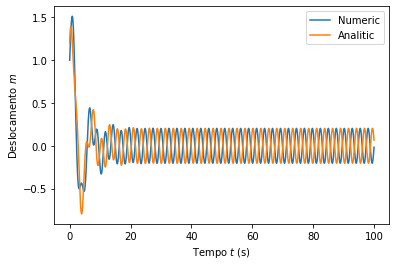

In [98]:
plt.plot(t, Y_num1[:, 0], label="Numeric")
plt.plot(t, x_total, label="Analitic")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Deslocamento $m$")

dtype(U) =  complex128


Text(0, 0.5, 'Phase($U$) = arg$\\left(U(\\omega)\\right)$')

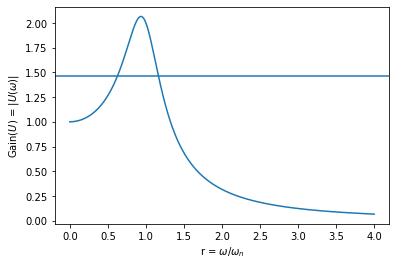

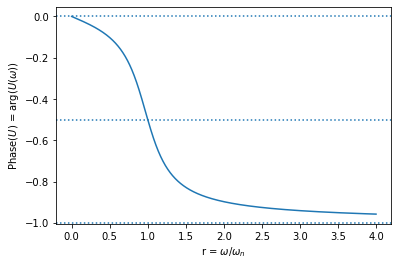

In [104]:
r = np.linspace(0, 4, 1024)
H = computeH(xi, r)
U = f0/H
print("dtype(U) = ", U.dtype)
gainU = np.abs(U)
phaseU = np.angle(U)
plt.figure()
plt.plot(r, gainU)
plt.axhline(y=np.max(gainU)/np.sqrt(2))
plt.xlabel(r"r = $\omega/\omega_{n}$")
plt.ylabel(r"Gain($U$) = $\|U(\omega)\|$")

plt.figure()
plt.plot(r, phaseU/np.pi)
plt.axhline(0, ls="dotted")
plt.axhline(-0.5, ls="dotted")
plt.axhline(-1, ls="dotted")
plt.xlabel(r"r = $\omega/\omega_{n}$")
plt.ylabel(r"Phase($U$) = arg$\left(U(\omega)\right)$")

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/sistema-massa-mola](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)